# Decision Tree Regressor

In [1]:
#Boston Housing Dataset: Load the boston dataset.
import numpy as np
import pandas as pd

import pickle
with open('boston.pkl', 'rb') as file:
    boston = pickle.load(file)

boston.data = np.delete(boston.data, obj=11, axis=1)
boston.feature_names = np.delete(boston.feature_names, obj=11, axis=0)

#Creating feature and target arrays
X, y = boston.data, boston.target
columns = boston.feature_names



df_boston = pd.DataFrame(X,columns=boston.feature_names)
df_boston['target'] = y


In [2]:
#Predicting house value from a single feature
#X_lstat = df_boston[['LSTAT']]
#y = df_boston[['target']]

In [3]:
from sklearn.model_selection import train_test_split

X=X[y<50]
y=y[y<50]

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.3,
                                                    random_state=42)

#DEFINE YOUR REGRESSOR and THE PARAMETERS GRID
from sklearn.tree import DecisionTreeRegressor
import numpy as np

regressor = DecisionTreeRegressor()
parameters = {"max_depth":[3,5,7],
              "min_samples_leaf": [10,20,30]}

#DEFINE YOUR GRIDSEARCH
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(regressor, parameters, cv=3, scoring ='neg_mean_absolute_error')
gs = gs.fit(X_train,y_train)

#summarize the results of your GRIDSEARCH
print('***GRIDSEARCH RESULTS***')
print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

#Returns the coefficient of determination R^2 of the prediction.
#Explained variance score: 1 is perfect prediction
gs.score(X_test, y_test)

***GRIDSEARCH RESULTS***
Best score: -3.016574 using {'max_depth': 5, 'min_samples_leaf': 10}
-3.348852 (0.033839) with: {'max_depth': 3, 'min_samples_leaf': 10}
-3.762332 (0.230438) with: {'max_depth': 3, 'min_samples_leaf': 20}
-3.891418 (0.247444) with: {'max_depth': 3, 'min_samples_leaf': 30}
-3.016574 (0.136819) with: {'max_depth': 5, 'min_samples_leaf': 10}
-3.687351 (0.296103) with: {'max_depth': 5, 'min_samples_leaf': 20}
-3.862111 (0.251452) with: {'max_depth': 5, 'min_samples_leaf': 30}
-3.023145 (0.114247) with: {'max_depth': 7, 'min_samples_leaf': 10}
-3.688583 (0.295296) with: {'max_depth': 7, 'min_samples_leaf': 20}
-3.862111 (0.251452) with: {'max_depth': 7, 'min_samples_leaf': 30}


-2.487207506157086

In [4]:
error_train=gs.predict(X_train)-y_train
error_test=gs.predict(X_test)-y_test
pd.DataFrame(error_train).describe()

,0
count,3.430000e+02
mean,-6.214659e-17
std,3.087073e+00
min,-1.461136e+01
25%,-1.649145e+00
50%,-1.136364e-02
75%,1.576461e+00
max,1.994000e+01


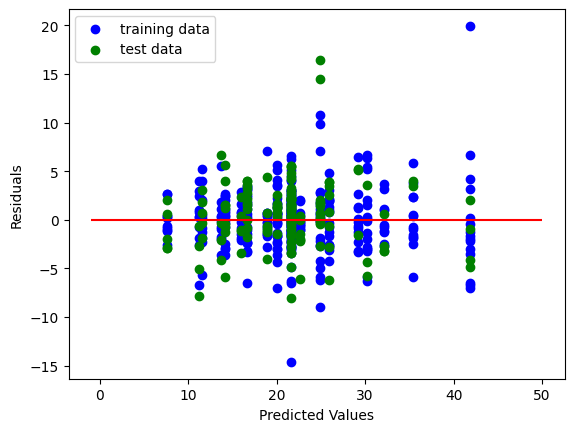

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(gs.predict(X_train),error_train, c="b", label="training data")
plt.scatter(gs.predict(X_test),error_test, c="g", label="test data")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend(loc="upper left")
plt.hlines(y=0, xmin=-1, xmax=50, color="r")
plt.show()

In [6]:
from sklearn import metrics

print("MAE train: ", metrics.mean_absolute_error(y_train, gs.predict(X_train)))
print("MSE train: ",metrics.mean_squared_error(y_train, gs.predict(X_train)))
print("RMSE train: ",np.sqrt(metrics.mean_squared_error(y_train, gs.predict(X_train))))
print("r2: ",np.sqrt(metrics.r2_score(y_train, gs.predict(X_train))))

print("MAE test: ", metrics.mean_absolute_error(y_test, gs.predict(X_test)))
print("MSE test: ",metrics.mean_squared_error(y_test, gs.predict(X_test)))
print("RMSE test: ",np.sqrt(metrics.mean_squared_error(y_test, gs.predict(X_test))))
print("r2: ",np.sqrt(metrics.r2_score(y_test, gs.predict(X_test))))

MAE train:  2.175517125645748
MSE train:  9.502234241853346
RMSE train:  3.082569422065519
r2:  0.9238221283775139
MAE test:  2.487207506157086
MSE test:  11.46899737866385
RMSE test:  3.386590819491462
r2:  0.884067141087202
